In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/reviews_data_dump/reviews_badminton/data.csv')
data.head()


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
data.shape

(8518, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
pd.unique(data['Ratings'])

array([4, 1, 3, 5, 2])

<Axes: xlabel='Ratings', ylabel='count'>

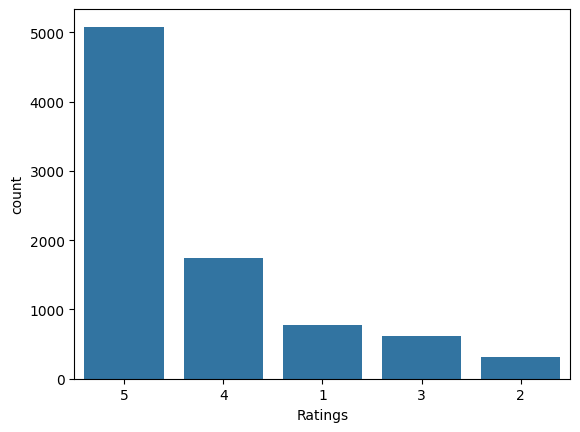

In [ ]:
sns.countplot(data=data,
			x='Ratings',
			order=data.Ratings.value_counts().index)

In [ ]:
pos_neg = []
for i in range(len(data['Ratings'])):
	if data['Ratings'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg


In [ ]:
from tqdm import tqdm
def preprocess_text(text_data):
	preprocessed_text = []
	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)
		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))
	return preprocessed_text


In [ ]:
if not isinstance(data['Review text'].values, str):
    data['Review text'] = data['Review text'].values.astype(str)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocessed_review = preprocess_text(data['Review text'].values)
data['Review text'] = preprocessed_review


100%|██████████| 8518/8518 [00:07<00:00, 1073.07it/s]


In [ ]:
data.head()


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,label
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,nice product good quality price rising bad sig...,4,0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,didnt supplied yonex mavis 350 outside cover y...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,worst product damaged shuttlecocks packed new ...,1,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,quite k nowadays quality corks like 3 5 years ...,3,0
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,pricedjust â¹620 retaileri didnt understand wa...,1,0


In [ ]:
data["label"].value_counts()


1    5080
0    3438
Name: label, dtype: int64

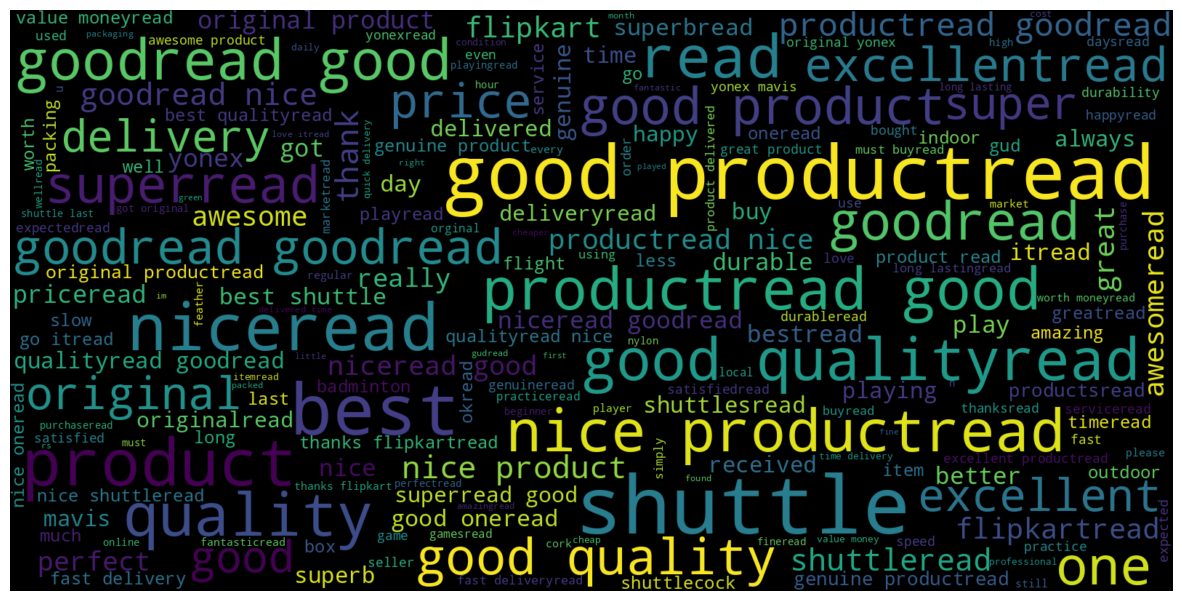

In [ ]:
consolidated = ' '.join(
	word for word in data['Review text'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review text'] ).toarray()


In [ ]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.8389696863500964


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_train)
print( accuracy_score(y_train, rf_pred))


0.8389696863500964


In [ ]:
from sklearn.svm import SVC
svc_model = SVC(random_state=0)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_train)
print( accuracy_score(y_train, svc_pred))


0.8112843875941825


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_train)
print( accuracy_score(y_train, gb_pred))


0.7163132994568074


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Specify the file path to save the model
file_path = 'rf_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(rf_model, file_path)


['rf_model.pkl']

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the file name
file_name = r'C:\Users\justin\Downloads\rf_model.pkl'

# Construct the file path
file_path = os.path.join(current_directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file '{file_name}' is located at: {file_path}")
else:
    print(f"The file '{file_name}' does not exist in the current directory.")


The file 'C:\Users\justin\Downloads\rf_model.pkl' does not exist in the current directory.


In [ ]:
try:
    # Save the trained model to the specified directory
    joblib.dump(rf_model, file_path)
    print("Model saved successfully at:", file_path)
except Exception as e:
    print("Error occurred while saving the model:", e)


Model saved successfully at: /content/C:\Users\justin\Downloads\rf_model.pkl


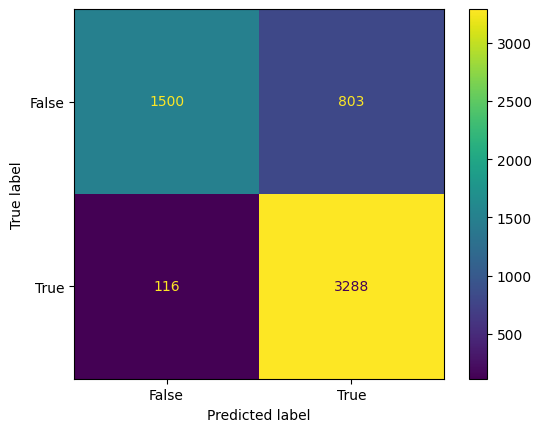

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
mlp_model = Sequential([
    Input(shape=input_shape),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print("MLP Accuracy:", mlp_accuracy)

Epoch 1/10
143/143 [==============================] - 3s 12ms/step - loss: 0.6479 - accuracy: 0.6331 - val_loss: 0.6004 - val_accuracy: 0.6760
Epoch 2/10
143/143 [==============================] - 1s 5ms/step - loss: 0.5341 - accuracy: 0.7411 - val_loss: 0.5856 - val_accuracy: 0.7049
Epoch 3/10
143/143 [==============================] - 1s 6ms/step - loss: 0.4768 - accuracy: 0.7726 - val_loss: 0.5995 - val_accuracy: 0.7023
Epoch 4/10
143/143 [==============================] - 1s 6ms/step - loss: 0.4414 - accuracy: 0.7930 - val_loss: 0.6160 - val_accuracy: 0.7040
Epoch 5/10
143/143 [==============================] - 1s 6ms/step - loss: 0.4193 - accuracy: 0.7989 - val_loss: 0.6597 - val_accuracy: 0.6935
Epoch 6/10
143/143 [==============================] - 1s 5ms/step - loss: 0.4036 - accuracy: 0.8033 - val_loss: 0.6824 - val_accuracy: 0.6988
Epoch 7/10
143/143 [==============================] - 1s 6ms/step - loss: 0.3907 - accuracy: 0.8101 - val_loss: 0.6991 - val_accuracy: 0.7023
Epoch

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize the model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)


Epoch 1/10
143/143 [==============================] - 25s 169ms/step - loss: 0.6043 - accuracy: 0.6898 - val_loss: 0.5732 - val_accuracy: 0.6883
Epoch 2/10
143/143 [==============================] - 21s 143ms/step - loss: 0.5209 - accuracy: 0.7483 - val_loss: 0.5888 - val_accuracy: 0.7084
Epoch 3/10
143/143 [==============================] - 22s 152ms/step - loss: 0.4800 - accuracy: 0.7689 - val_loss: 0.6130 - val_accuracy: 0.7067
Epoch 4/10
143/143 [==============================] - 23s 160ms/step - loss: 0.4497 - accuracy: 0.7849 - val_loss: 0.6388 - val_accuracy: 0.6953
Epoch 5/10
143/143 [==============================] - 22s 156ms/step - loss: 0.4285 - accuracy: 0.7930 - val_loss: 0.6722 - val_accuracy: 0.6594
Epoch 6/10
143/143 [==============================] - 20s 139ms/step - loss: 0.4106 - accuracy: 0.8028 - val_loss: 0.7158 - val_accuracy: 0.6637
Epoch 7/10
143/143 [==============================] - 22s 157ms/step - loss: 0.3908 - accuracy: 0.8074 - val_loss: 0.7488 - val_ac

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Retrain the model using the current version of scikit-learn
rf_model_retrained = RandomForestClassifier(random_state=0)
rf_model_retrained.fit(X_train, y_train)

# Save the retrained model to a .pkl file
file_path_retrained = 'rf_model_retrained.pkl'
joblib.dump(rf_model_retrained, file_path_retrained)

# Optionally, you can also load the retrained model back from the .pkl file
loaded_rf_model_retrained = joblib.load(file_path_retrained)

# Make predictions using the loaded retrained model (optional)
rf_pred_retrained = loaded_rf_model_retrained.predict(X_train)
print("Accuracy on the retrained model:", accuracy_score(y_train, rf_pred_retrained))


Accuracy on the retrained model: 0.8389696863500964
